## AI-Powered Trading, Algorithmic Collusion, and Price Efficiency by Goldstein et al - Result Replication

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from util import simulate
from agents import *
from config import Config

The overall collusiveness of all the agents is measured by
$$
\Delta^C = \frac{1}{I}\sum_{i=1}^I \Delta_i^C
$$
where
$$
\Delta_i^C = \frac{\bar{\pi}_i - \bar{\pi}^N_i}{\bar{\pi}^M_i - \bar{\pi}^N_i}
$$
and
$$
\bar{\pi}_i = \frac{1}{T}\sum_{t = T_c}^{T_c + T} \pi_{i,t}(v_t, u_t)
$$

The corresponding nash equilibrium in the perfect collusive case and the noncollusive case are
$$
\pi^N(v_t, u_t) = [v_t - p^N(Ix^N(v_t) + u_t)]x^N(v_t), \ \forall i
$$
$$
\pi^M(v_t, u_t) = [v_t - p^M(Ix^M(v_t) + u_t)]x^M(v_t), \ \forall i
$$
where $$x^M(v_t) = \chi^M(v_t - \bar{v})$$, and $$p^M(Ix^M(v_t) + u_t) = \bar{v} + \lambda^M (Ix^M(v_t) + u_t)$$, and $$x^N(v_t) = \chi^N(v_t - \bar{v})$$, and $$p^N(Ix^N(v_t) + u_t) = \bar{v} + \lambda^N (Ix^N(v_t) + u_t)$$

In [5]:
# sim_0_path = '/Users/moyuanchen/Documents/thesis/sim_0/'
sim_1_path = '/Users/mike/Documents/thesis/sim_1/'
sim_2_path = '/Users/mike/Documents/thesis/sim_2/'

In [13]:
sim_1_fn = [n for n in os.listdir(sim_1_path) if n.startswith('data')]
sim_1_fn = sorted(sim_1_fn, key=lambda x: int(x[10:-4]))
sim_1_fn = [sim_1_path + n for n in sim_1_fn]

sim_2_fn = [n for n in os.listdir(sim_2_path) if n.startswith('data')]
sim_2_fn = sorted(sim_2_fn, key=lambda x: int(x[10:-4]))
sim_2_fn = [sim_2_path + n for n in sim_2_fn]

Let's try to compute $\Delta^C$ for these two simulations

In [29]:
config = Config()
config.sigma_u = 0.1

_save_path = '/Users/mike/Documents/thesis/sim_1/data_part_36.npy'
log, agents = simulate(config = config, T = 10000, save_path=_save_path, continue_simulation=sim_1_fn[-1])

Simulation Progress: 100%|██████████| 10000/10000 [00:02<00:00, 3962.01it/s]


In [32]:
def calculate_Delta_C(data, config):
    v, p, z, x, u, profit = data['v'], data['p'], data['z'], data['x'], data['u'], data['profit']
    informed = data['agents']['informed']
    noise = data['agents']['noise']
    preferred_habitat = data['agents']['preferred_habitat']
    market_maker = data['agents']['market_maker']

    chi_M, chi_N = informed[0].chiM, informed[0].chiN
    lambda_M, lambda_N = informed[0].lambdaM, informed[0].lambdaN

    x_N = chi_N * (v - config.v_bar)
    x_M = chi_M * (v - config.v_bar)

    p_factor_N = config.v_bar + lambda_N * (config.I * x_N + u)
    p_factor_M = config.v_bar + lambda_M * (config.I * x_M + u)

    pi_N = (v - p_factor_N) * x_N
    pi_M = (v - p_factor_M) * x_M

    pi_N_bar = np.mean(pi_N)
    pi_M_bar = np.mean(pi_M)

    pi_bar = np.mean(profit)
    print(pi_N_bar, pi_M_bar, pi_bar)
    Delta_C = (pi_bar - pi_N_bar) / (pi_M_bar - pi_N_bar)
    return Delta_C


In [33]:
data = np.load(_save_path, allow_pickle=True).item()
Delta_C = calculate_Delta_C(data, config)
Delta_C

46.92495329120548 52.790693704234485 138.1248828264838


15.547897300859876

In [19]:
# sim 1 Delta^C
sim_1 = np.load(sim_1_fn[-1], allow_pickle=True).item()
sim_1_config = np.load('/Users/mike/Documents/thesis/sim_1/config.npy', allow_pickle=True).item()

In [20]:
sim_1_config

Config(I=2, v_bar=1, sigma_v=1, Np=31, Nv=10, Nx=15, iota=0.1, rho=0.95, alpha=0.01, beta=1e-05, xi=500, theta=0.1, Tm=10000, u_bar=0, sigma_u=0.1)

In [17]:
sim_1

{'v': array([0.87433863, 0.32551026, 1.67448974, ..., 1.67448974, 2.0364337 ,
        0.32551026]),
 'p': array([0.51971766, 0.9466353 , 1.42691763, ..., 1.16009411, 0.78654118,
        0.57308237]),
 'z': array([ 240.14116806,   26.68235201, -213.45881605, ...,  -80.04705602,
         106.72940803,  213.45881605]),
 'x': array([[ 170.83330167,  -48.80951476, -146.42854429, ...,  -73.21427214,
          170.83330167,  122.0237869 ],
        [-146.42854429, -170.83330167,  170.83330167, ...,  170.83330167,
           48.80951476,  170.83330167]]),
 'u': array([ 0.09578374, -0.03633724, -0.1479954 , ..., -0.04222038,
         0.04750871,  0.18121838]),
 'profit': array([[ -13.25409006,   54.41122371, -105.73033309, ...,  -64.09581291,
          253.09669681,  -10.08523982],
        [  11.36064863,  190.439283  ,  123.35205528, ...,  149.55689679,
           72.31334195,  -14.11933574]]),
 'last_state': (4, 1),
 'convergence_counter': 1020715,
 'agents': {'informed': [<agents.InformedAgen

In [40]:
(sim_1['v'][:-1] - sim_1['p'][1:]) * sim_1['x'][:,:-1]

array([[ -12.35067869,   53.75915922, -106.57866618, ...,  -87.8759029 ,
         -65.01050698,  249.98913901],
       [  10.58629602,  188.15705727,  124.34177722, ...,   50.21480166,
         151.69118295,   71.42546829]])

In [35]:
sim_1['profit']

array([[ -13.25409006,   54.41122371, -105.73033309, ...,  -64.09581291,
         253.09669681,  -10.08523982],
       [  11.36064863,  190.439283  ,  123.35205528, ...,  149.55689679,
          72.31334195,  -14.11933574]])

In [25]:
informed = sim_1['agents']['informed']
lambdaM, lambdaN = informed[0].lambdaM, informed[0].lambdaN
chiM, chiN = informed[0].chiM, informed[0].chiN

In [ ]:
data = np.load(folder+filename_converged[0], allow_pickle=True).item()
profit = data['profit']
v = data['v']
y = data['y']
for n in filename_converged[1:]:
    
    data = np.load(folder + n, allow_pickle=True).item()
    profit = np.concatenate((profit, data['profit']), axis = 1)
    # print(sum([data['agents']['informed'][0].state_count[i] for i in data['agents']['informed'][0].state_count]))



In [36]:
profit.shape

(3, 2500000)

In [47]:
data

{'v': array([ 0.06541073, -0.43953145,  1.45376229, ..., -0.9599638 ,
         1.45376229, -0.15034938]),
 'p': array([0.30963918, 1.45023532, 1.7503922 , ..., 0.4897333 , 1.12006275,
        0.63981174]),
 'z': array([ 345.18041207, -225.11766005, -375.19610008, ...,  255.13334805,
         -60.03137601,  180.09412804]),
 'x': array([[-129.16665167, -120.25860672,  120.25860672, ...,  111.35056178,
          -40.08620224, -102.44251684],
        [-120.25860672, -120.25860672,  129.16665167, ...,  -31.1781573 ,
          111.35056178,   66.81033707],
        [  40.08620224, -120.25860672,  120.25860672, ..., -129.16665167,
          120.25860672, -129.16665167]]),
 'y': array([[-129.16665167, -120.25860672,  120.25860672, ...,  111.35056178,
          -40.08620224, -102.44251684],
        [-120.25860672, -120.25860672,  129.16665167, ...,  -31.1781573 ,
          111.35056178,   66.81033707],
        [  40.08620224, -120.25860672,  120.25860672, ..., -129.16665167,
          120.258606

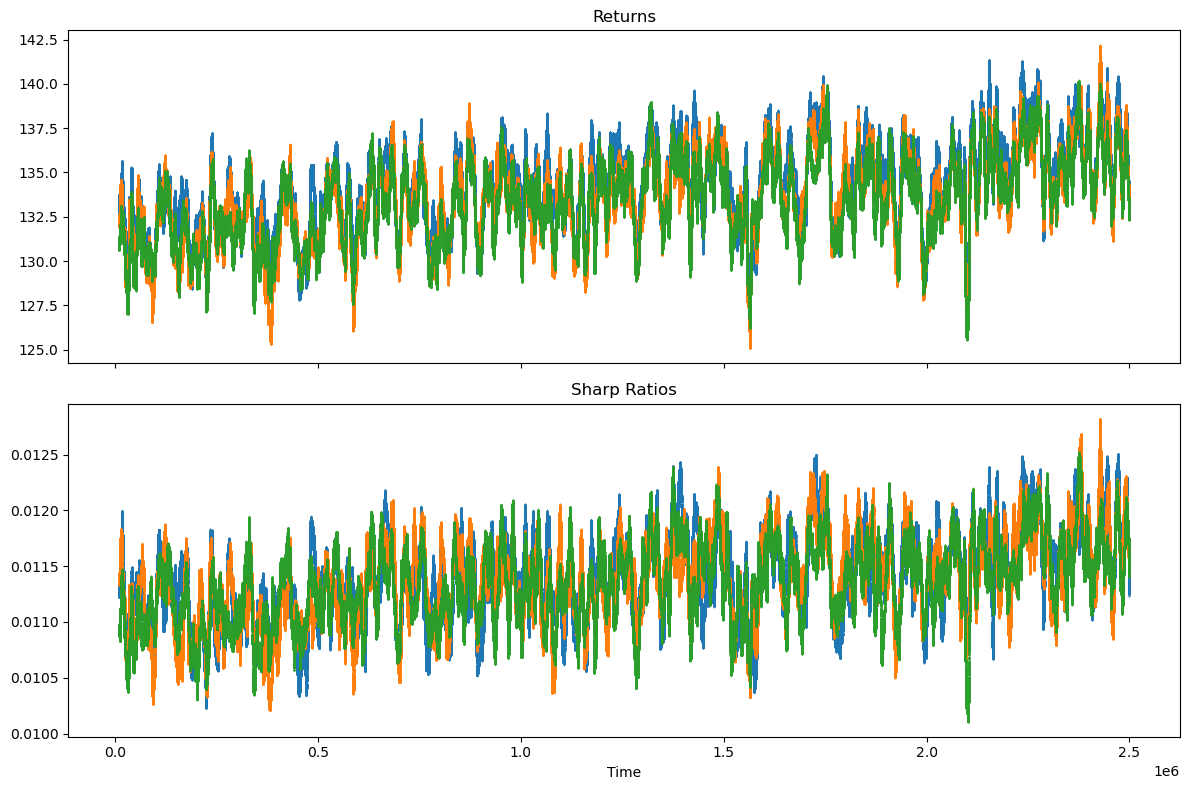

In [41]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
window_size = 10000
for i in range(3):
    profit_series = pd.Series(profit[i])
    returns = profit_series
    returns_mean = returns.rolling(window=window_size).mean()
    profit_var = profit_series.rolling(window=window_size).var()
    sharp_ratio = returns_mean / profit_var
    
    axes[0].plot(returns_mean, '.', markersize=0.5, label=f'Returns {i}')
    axes[1].plot(sharp_ratio, '.', markersize=0.5, label=f'Sharp Ratio {i}')

axes[0].set_title('Returns')
axes[1].set_title('Sharp Ratios')
# axes[0].legend()
# axes[1].legend()
plt.xlabel('Time')
plt.tight_layout()
plt.show()

In [ ]:
average_return = np.mean(profit)
chiN, lambdaN = solve_chiN(I = 3, xi = 500, sigma_u = 0.1, sigma_v = 1, theta = 0.1)
chiM, lambdaM = solve_chiM(I = 3, xi = 500, sigma_u = 0.1, sigma_v = 1, theta = 0.1)


In [46]:
lambdaN

0.0020000002666666263

In [18]:
data

{'v': array([-0.43953145, -0.9599638 , -0.9599638 , ...,  1.5977602 ,
         1.93458927,  1.75541496]),
 'p': array([0.27962349, 1.78040789, 1.78040789, ..., 0.30963918, 0.30963918,
        0.30963918]),
 'z': array([ 360.18825608, -390.20394408, -390.20394408, ...,  345.18041207,
         345.18041207,  345.18041207]),
 'x': array([[-120.25860672, -129.16665167, -129.16665167, ...,  129.16665167,
          129.16665167,  129.16665167],
        [-120.25860672, -120.25860672, -120.25860672, ...,  129.16665167,
          129.16665167,  129.16665167],
        [-129.16665167, -120.25860672, -120.25860672, ...,  129.16665167,
          129.16665167,  129.16665167]]),
 'y': array([[-120.25860672, -129.16665167, -129.16665167, ...,  129.16665167,
          129.16665167,  129.16665167],
        [-120.25860672, -120.25860672, -120.25860672, ...,  129.16665167,
          129.16665167,  129.16665167],
        [-129.16665167, -120.25860672, -120.25860672, ...,  129.16665167,
          129.166651